<a href="https://colab.research.google.com/github/AuraFrizzati/GoogleCloud-Terraform-EDX-course/blob/main/05_Introduction_to_Terraform_State.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[05] Introduction to Terraform State**

The module starts with an introduction to Terraform state. You’ll then learn about the different ways to store Terraform state. Later in the module you’ll explore the benefits of storing the state file in a remote location. While there are many remote locations in which you can store the state file, this module describes how to store it in a Google Cloud Storage Bucket. You’ll wrap up the module by learning best practices for working with state files.

Upon completing this module you will be able to

- Define **Terraform state**.
- List the **benefits** of **storing the state file remotely**.
- Explain how to **store** the **Terraform state** in a **Google Cloud Storage bucket**.
- Explain Terraform state **best practices**.

To ensure **efficient Terraform workflows** and a **faster collaboration**, it's imperative that **infrastructure changes** are **tracked** and **monitored**. In Terraform, you can use the **state file** to achieve these objectives.

A **Terraform state** stores **metadata** for your **infrastructure configuration** to keep track of it. It describes the **state** of your **infrastructure's resources**.

## **5.1: Introducton to Terraform State**


### Terraform State

- A **state** is a **metadata repository** of your **infrastructure configuration**

- Terraform saves the state of the resources and that manages in the **state file**.

- By **default**, a state file is **stored in a local file** named `terraform.tfstate`

- State files can also be **stored remotely**, which is recommended for team environments

- Terraform uses the local state to create plans and change your infrastructure

- Before any operation, Terraform does a refresh to update the stored state with the real infrastructure

- A **Terraform state** stores the **bindings between objects** in a **remote system** and **resource instances** declared in your configuration

- The **state file** records the **identity** of an **instance** and **updates or deletes** in response to **configuration changes**

### **How information is stored in a Terraform state file**

- Every infrastructure created within a resource block is identified with its own name within the Terraform state

- When a Terraform configuration is applied for the first time, the infrastructure resources are created and a state file is automatically generated with a reference to the name mentioned in the resource block

- If a resource already has an entry in the Terraform state file, then Terraform compares the configuration with the state file and the current live state

- Based on the comparisons, a Plan is generated

- When the plan is applied, it updates the resources to match the configuration defined

- Once the configuration is applied, the Terraform state file is updated to reflect the current state of the infrastructure

- If arguments cannot be updated in place due to a remote API limitations, the resources are destroyed and recreated

- If a resource is removed from the current configuration but has an entry in the state file, then Terraform compares the configuration and destroys the resources that no longer exist

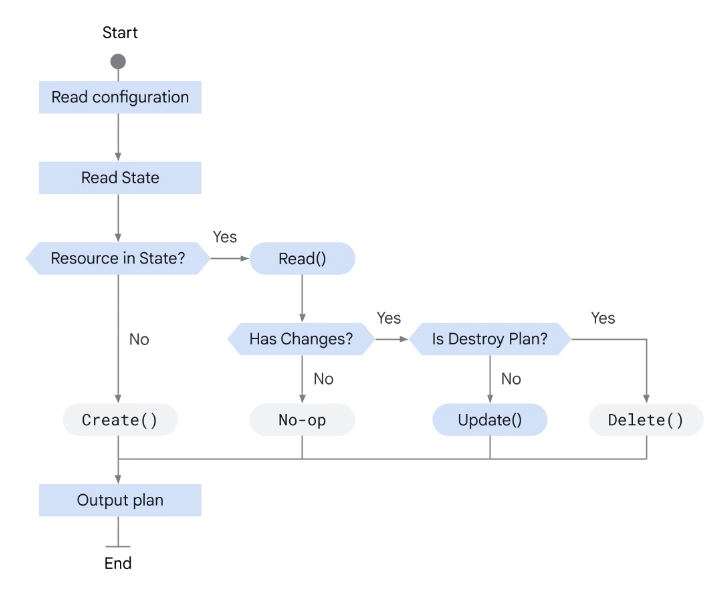

## **5.2: Storing State Files**

### **Ways to save a state file**

- **Save locally**: the `terraform apply` command **automatically generates a state file** that is saved in a **working directory**
  - Local states work well when there is only one developer working on a project

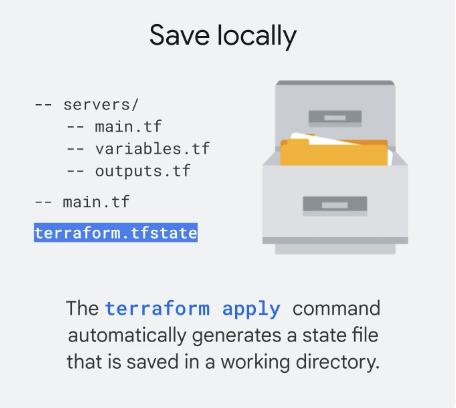

- **Save remotely**: the file is stored in a remote location such as a **Google Storage bucket** or **Terraform Cloud**
  - This is ideal for working as a team since your Terraform state file is updated and synced remotely, so the team will always be working with the updated infrastructure

### **Issues with storing the Terraform state locally**

- **No shared access**: for any update to the infrastructure, each member of your team needs access to the same state file

- **No locking**: when team members run Terraform at the same time, they run into **conflict in access**, which leads to **corruption** and **data loss**

- **No confidentiality**: state file exposes all **sensitive data** (e.g. username and password of the database)

### **Benefits of storing state file in a remote location**

- **Automatic updates**: remote state supports automatic updates to the state file.
  - Once you **configure** a **remote backend**, Terraform will automatically load the state file from the backend every time you run the plan or apply commands.
  - It will also **automatically store the state file in that backend** after each apply

- **Locking**: **Cloud Storage buckets** natively **support state locking**

- **Secure access**: **Google Cloud Storage buckets** support **encryption** (both **in transit** and **on disk**) and **IAM policies** (more secure than local storage)

### **Store Terraform state remotely in a Cloud Storage bucket**

1. Add the `"google_storage_bucket"` resource to a Terraform configuration file such as `main.tf`. In the code snippet, the location field is hard coded to US (a multi-region bucket in the US will be created). You can change this field to a location of your choice

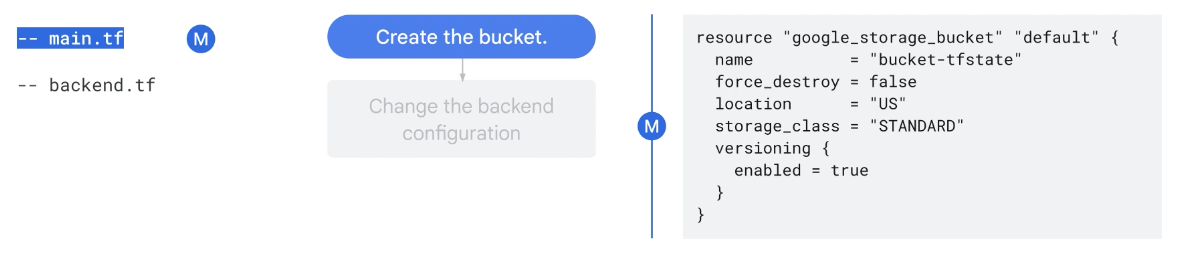

2. Run `terraform apply` to create the storage bucket

3. Add the following code to a new Terraform configuration file called `backend-tf`. Ensure that the bucket name in this file is updated to match the name of your Google storage bucket previously created

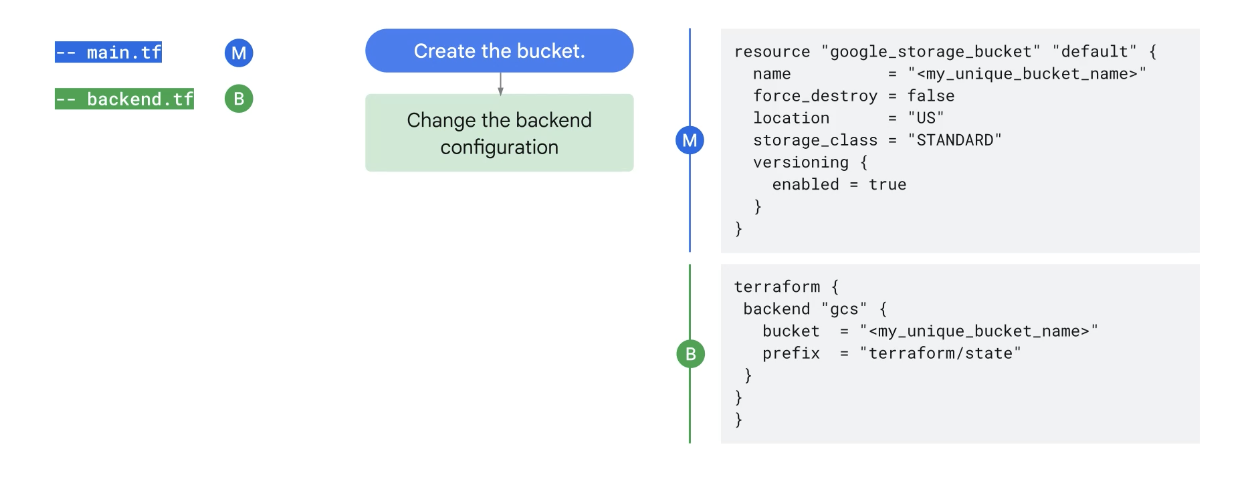

4. Run `terraform init`: Terraform detects that you already have a state file locally and prompts you to copy it to the new cloud storage bucket. Enter 'yes'. After this, your Terraform state gets stored in the cloud storage bucket

5. Terraform will pull the latest state from the bucket before running a command and pushes the latest to the bucket after running it

### **Example of a state file**

The example includes metadata, such as resource `type` and `name`, and the `provider` name

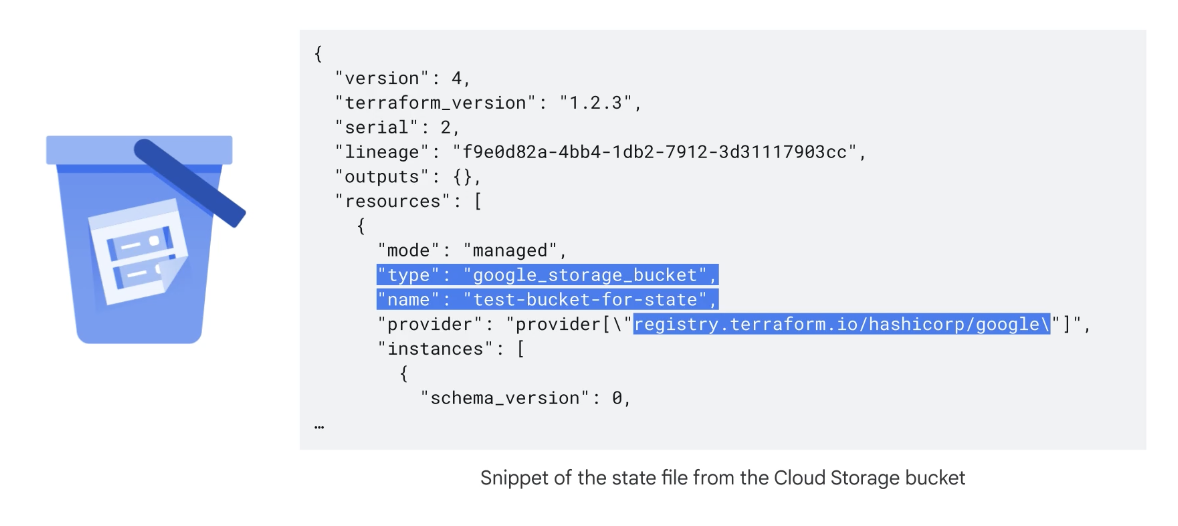

## **5.3: Terraform state best practices**

- **Use remote state when working in teams**: remote state supports **locking** and **versioning**. Google Cloud customers should use the **Cloud Storage state bucket** to lock the state, separating sensitive information from version control and ensure that only the build system and highly privileged administrators have access to the remote state bucket. To prevent accidentally comitting development state to source control use git ignore for Terraform state files

- **Don't store secrets in a state file**: avoid storing secrets in a state because Terraform stores secret values in plain text

- **Encrypt state**: to add an extra layer of protection, use **customer-supplied encryption keys**, even if cloud storage buckets are encrypted at rest

- **Don't modify state manually**: use the `terraform state` command when you need to modify a state. The integrity of the file is critical to maintain correct mapping between the Terraform configuration and Google Cloud resources. Corruption can lead to major infrastructure problems